<a href="https://colab.research.google.com/github/Ravishekhar7870/A/blob/master/Cryptopredicti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, LayerNormalization, MultiHeadAttention, Input, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("dataset.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Select relevant columns
crypto_name = 'Bitcoin'  # Change if needed
df = df[df['crypto_name'] == crypto_name]
prices = df[['close']].values

# Normalize data
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Using past 30 days to predict next day
X, y = create_sequences(prices_scaled, seq_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Define LSTM Model
def build_lstm_model():
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
        LSTM(50),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Define GRU Model
def build_gru_model():
    model = Sequential([
        GRU(50, return_sequences=True, input_shape=(seq_length, 1)),
        GRU(50),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Define Transformer Model
def build_transformer_model():
    inputs = Input(shape=(seq_length, 1))
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(num_heads=2, key_dim=32)(x, x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(1)(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    model.compile(optimizer='adam', loss='mse')
    return model

# Train and evaluate models
models = {'LSTM': build_lstm_model(), 'GRU': build_gru_model(), 'Transformer': build_transformer_model()}
history = {}

for name, model in models.items():
    print(f"Training {name}...")
    history[name] = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# Plot Loss Curves
plt.figure(figsize=(10, 6))
for name in models.keys():
    plt.plot(history[name].history['loss'], label=f'{name} Loss')
    plt.plot(history[name].history['val_loss'], label=f'{name} Val Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [ ]:
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'timestamp', 'crypto_name', 'date'],
      dtype='object')



Training Random Forest model...

Training SVM model...

Training XGBoost model...

Model Performance Metrics:
                      MAE         RMSE  R² Score
Random Forest   12.253871   207.966650  0.998445
SVM            825.816428  5191.688528  0.031114
XGBoost         27.291035   210.234155  0.998411


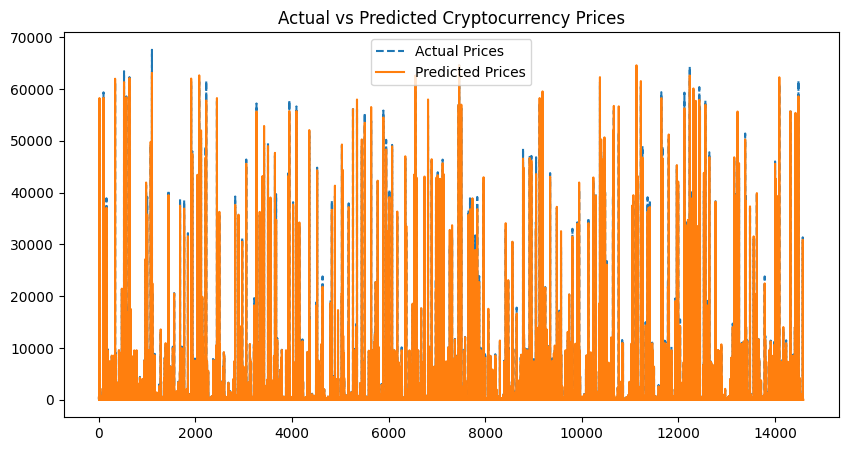

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "dataset.csv"  # Path in Google Colab
df = pd.read_csv(file_path)

# Drop Unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert timestamp to UNIX format
df['timestamp'] = pd.to_datetime(df['timestamp']).astype(int) // 10**9

# Feature selection
features = ['open', 'high', 'low', 'volume', 'marketCap', 'timestamp']
target = 'close'

# Extract features and target variable
X = df[features]
y = df[target]

# Train-test split (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror', random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name} model...")

    if name == "SVM":
        model.fit(X_train_scaled, y_train)  # SVM requires scaled data
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Compute Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

# Plot actual vs predicted prices (for XGBoost)
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Prices", linestyle='dashed')
plt.plot(y_pred, label="Predicted Prices")
plt.legend()
plt.title("Actual vs Predicted Cryptocurrency Prices")
plt.show()



Training Logistic Regression model...

Training SVM model...

Training Random Forest model...

Training XGBoost model...

Model Performance Metrics:
                      Accuracy  Precision     Recall   F1-Score
Logistic Regression  64.996573  59.213800  97.421203  73.657606
SVM                  64.866347  59.219888  96.534316  73.407346
Random Forest        73.653187  74.312823  72.670214  73.482340
XGBoost              75.764222  76.263675  75.139855  75.697595

Detailed Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      7261
           1       0.76      0.75      0.76      7329

    accuracy                           0.76     14590
   macro avg       0.76      0.76      0.76     14590
weighted avg       0.76      0.76      0.76     14590



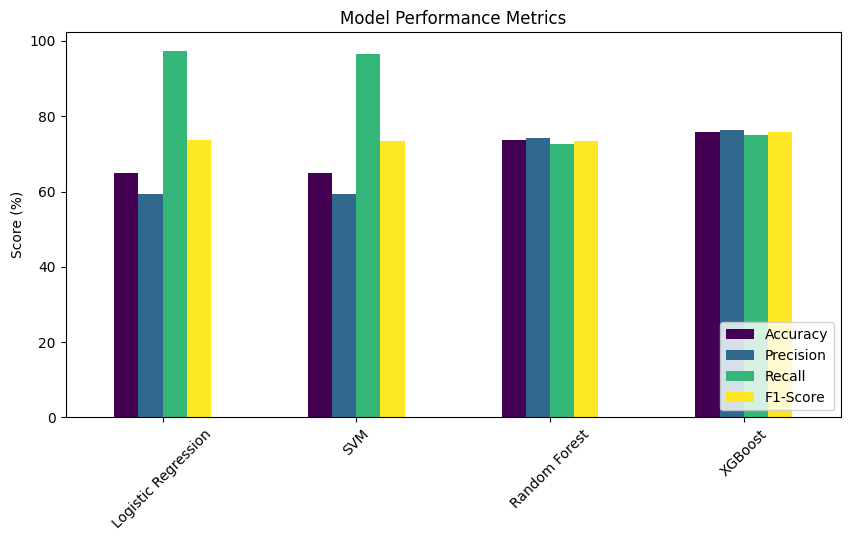

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
file_path = "dataset.csv"  # Path in Google Colab
df = pd.read_csv(file_path)

# Drop Unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert timestamp to UNIX format
df['timestamp'] = pd.to_datetime(df['timestamp']).astype(int) // 10**9

# Create target variable (1 = Price Up, 0 = Price Down)
df['price_movement'] = (df['close'].shift(-1) > df['close']).astype(int)

# Drop last row (NaN in price_movement)
df = df.dropna()

# Feature selection
features = ['open', 'high', 'low', 'volume', 'marketCap', 'timestamp']
target = 'price_movement'

# Extract features and target variable
X = df[features]
y = df[target]

# Train-test split (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for SVM & Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name} model...")

    if name in ["SVM", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)  # Requires scaled data
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

# Classification report for best model (XGBoost)
print("\nDetailed Classification Report (XGBoost):")
print(classification_report(y_test, models["XGBoost"].predict(X_test)))

# Plot Model Performance
results_df.plot(kind='bar', figsize=(10,5), colormap='viridis')
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()



Training Random Forest model...

Training SVM model...

Training XGBoost model...

📊 Regression Model Performance Metrics:
                      MAE         RMSE  R² Score
Random Forest   12.253871   207.966650  0.998445
SVM            825.816428  5191.688528  0.031114
XGBoost         27.291035   210.234155  0.998411

📈 Classification Performance Metrics:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.996436   0.996848  0.996030  0.996439
SVM            0.745082   0.745380  0.745482  0.745431
XGBoost        0.957434   0.990892  0.923467  0.955992


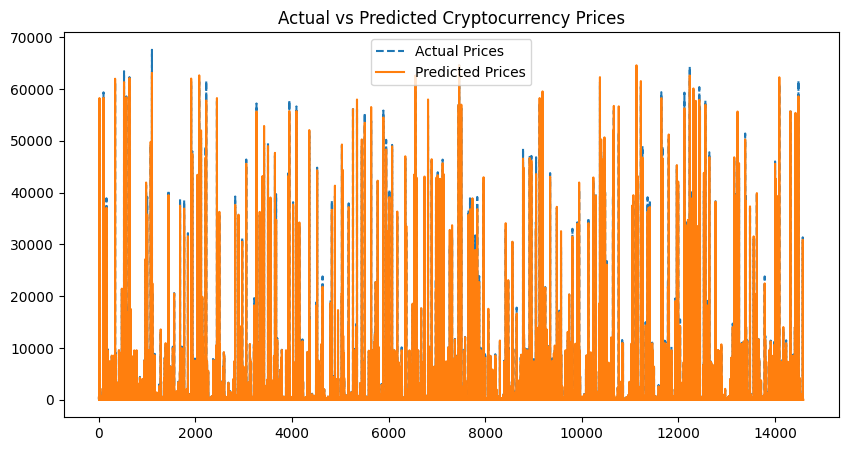

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Load dataset
file_path = "dataset.csv"  # Path in Google Colab
df = pd.read_csv(file_path)

# Drop Unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert timestamp to UNIX format
df['timestamp'] = pd.to_datetime(df['timestamp']).astype(int) // 10**9

# Feature selection
features = ['open', 'high', 'low', 'volume', 'marketCap', 'timestamp']
target = 'close'

# Extract features and target variable
X = df[features]
y = df[target]

# Train-test split (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror', random_state=42)
}

results = {}
classification_results = {}

for name, model in models.items():
    print(f"\nTraining {name} model...")

    if name == "SVM":
        model.fit(X_train_scaled, y_train)  # SVM requires scaled data
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Compute Regression Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

    # Convert Regression Predictions into Classification Labels
    y_test_class = (y_test.diff().fillna(0) > 0).astype(int)  # Convert to binary labels (0 = decrease, 1 = increase)
    y_pred_class = (np.diff(y_pred) > 0).astype(int)  # Predict binary labels based on changes

    # Remove the first value as np.diff reduces the length by 1
    y_test_class = y_test_class[1:]

    # Compute Classification Metrics
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)

    classification_results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

# Display Regression Results
results_df = pd.DataFrame(results).T
print("\n📊 Regression Model Performance Metrics:")
print(results_df)

# Display Classification Results
classification_results_df = pd.DataFrame(classification_results).T
print("\n📈 Classification Performance Metrics:")
print(classification_results_df)

# Plot actual vs predicted prices (for XGBoost)
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Prices", linestyle='dashed')
plt.plot(y_pred, label="Predicted Prices")
plt.legend()
plt.title("Actual vs Predicted Cryptocurrency Prices")
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Load dataset
file_path = "dataset.csv"  # Path in Google Colab
df = pd.read_csv(file_path)

# Drop Unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert timestamp to UNIX format
df['timestamp'] = pd.to_datetime(df['timestamp']).astype(int) // 10**9

# Feature selection
features = ['open', 'high', 'low', 'volume', 'marketCap', 'timestamp']
target = 'close'

# Extract features and target variable
X = df[features]
y = df[target]

# Train-test split (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror', random_state=42)
}

results = {}
classification_results = {}
all_preds = {}

for name, model in models.items():
    print(f"\nTraining {name} model...")

    if name == "SVM":
        model.fit(X_train_scaled, y_train)  # SVM requires scaled data
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    all_preds[name] = y_pred

    # Compute Regression Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

    # Convert Regression Predictions into Classification Labels
    y_test_class = (y_test.diff().fillna(0) > 0).astype(int)  # Convert to binary labels (0 = decrease, 1 = increase)
    y_pred_class = (np.diff(y_pred) > 0).astype(int)  # Predict binary labels based on changes

    # Remove the first value as np.diff reduces the length by 1
    y_test_class = y_test_class[1:]

    # Compute Classification Metrics
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)

    classification_results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

# Display Regression Results
results_df = pd.DataFrame(results).T
print("\n📊 Regression Model Performance Metrics:")
print(results_df)

# Display Classification Results
classification_results_df = pd.DataFrame(classification_results).T
print("\n📈 Classification Performance Metrics:")
print(classification_results_df)

# Plot Regression Metrics
plt.figure(figsize=(12, 5))
results_df.plot(kind='bar', figsize=(12, 5), title="Regression Metrics Comparison")
plt.xticks(rotation=0)
plt.ylabel("Metric Value")
plt.grid(axis='y')
plt.show()

# Plot Classification Metrics
plt.figure(figsize=(12, 5))
classification_results_df.plot(kind='bar', figsize=(12, 5), title="Classification Metrics Comparison")
plt.xticks(rotation=0)
plt.ylabel("Metric Value")
plt.grid(axis='y')
plt.show()

# Scatter plot for actual vs predicted prices
plt.figure(figsize=(12, 5))
for name, y_pred in all_preds.items():
    plt.scatter(y_test, y_pred, label=name, alpha=0.6)
plt.plot(y_test, y_test, color='black', linestyle='dashed', label='Perfect Fit')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'


Training Random Forest model...

📋 Detailed Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7285
           1       1.00      1.00      1.00      7304

    accuracy                           1.00     14589
   macro avg       1.00      1.00      1.00     14589
weighted avg       1.00      1.00      1.00     14589



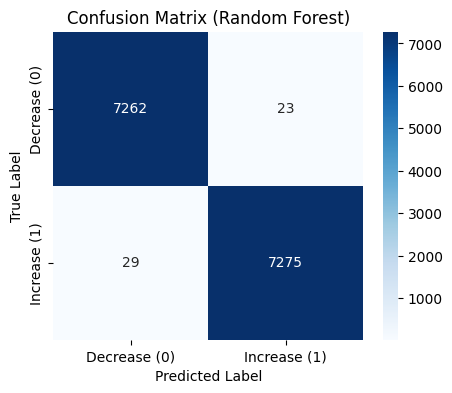


Training SVM model...

📋 Detailed Classification Report (SVM):

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      7285
           1       0.75      0.75      0.75      7304

    accuracy                           0.75     14589
   macro avg       0.75      0.75      0.75     14589
weighted avg       0.75      0.75      0.75     14589



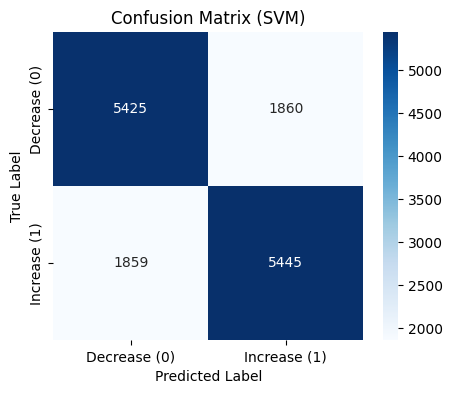


Training XGBoost model...

📋 Detailed Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7285
           1       0.99      0.92      0.96      7304

    accuracy                           0.96     14589
   macro avg       0.96      0.96      0.96     14589
weighted avg       0.96      0.96      0.96     14589



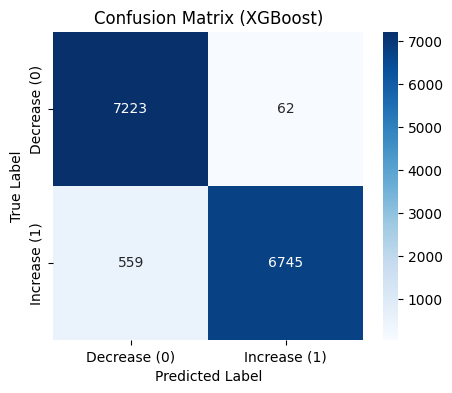


📊 Regression Model Performance Metrics:
                      MAE         RMSE  R² Score
Random Forest   12.253871   207.966650  0.998445
SVM            825.816428  5191.688528  0.031114
XGBoost         27.291035   210.234155  0.998411

📈 Classification Performance Metrics:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.996436   0.996848  0.996030  0.996439
SVM            0.745082   0.745380  0.745482  0.745431
XGBoost        0.957434   0.990892  0.923467  0.955992


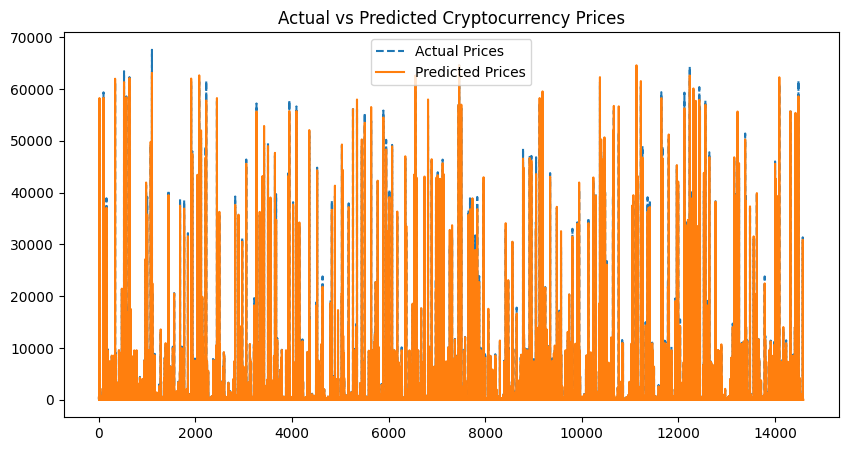

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
)

# Load dataset
file_path = "dataset.csv"  # Path in Google Colab
df = pd.read_csv(file_path)

# Drop Unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert timestamp to UNIX format
df['timestamp'] = pd.to_datetime(df['timestamp']).astype(int) // 10**9

# Feature selection
features = ['open', 'high', 'low', 'volume', 'marketCap', 'timestamp']
target = 'close'

# Extract features and target variable
X = df[features]
y = df[target]

# Train-test split (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror', random_state=42)
}

results = {}
classification_results = {}

for name, model in models.items():
    print(f"\nTraining {name} model...")

    if name == "SVM":
        model.fit(X_train_scaled, y_train)  # SVM requires scaled data
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Compute Regression Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

    # Convert Regression Predictions into Classification Labels
    y_test_class = (y_test.diff().fillna(0) > 0).astype(int)  # Convert to binary labels (0 = decrease, 1 = increase)
    y_pred_class = (np.diff(y_pred) > 0).astype(int)  # Predict binary labels based on changes

    # Remove the first value as np.diff reduces the length by 1
    y_test_class = y_test_class[1:]

    # Compute Classification Metrics
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)

    classification_results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

    # Print detailed classification report for each model
    print(f"\n📋 Detailed Classification Report ({name}):\n")
    print(classification_report(y_test_class, y_pred_class))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test_class, y_pred_class)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Decrease (0)", "Increase (1)"], yticklabels=["Decrease (0)", "Increase (1)"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix ({name})")
    plt.show()

# Display Regression Results
results_df = pd.DataFrame(results).T
print("\n📊 Regression Model Performance Metrics:")
print(results_df)

# Display Classification Results
classification_results_df = pd.DataFrame(classification_results).T
print("\n📈 Classification Performance Metrics:")
print(classification_results_df)

# Plot actual vs predicted prices (for XGBoost)
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Prices", linestyle='dashed')
plt.plot(y_pred, label="Predicted Prices")
plt.legend()
plt.title("Actual vs Predicted Cryptocurrency Prices")
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63902 entries, 0 to 63901
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   63902 non-null  int64  
 1   open         63902 non-null  float64
 2   high         63902 non-null  float64
 3   low          63902 non-null  float64
 4   close        63902 non-null  float64
 5   volume       63902 non-null  float64
 6   marketCap    63902 non-null  float64
 7   timestamp    63901 non-null  object 
 8   crypto_name  63901 non-null  object 
 9   date         63901 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 4.9+ MB


(None,
    Unnamed: 0        open        high         low       close  volume  \
 0           0  112.900002  118.800003  107.142998  115.910004     0.0   
 1           1    3.493130    3.692460    3.346060    3.590890     0.0   
 2           2  115.980003  124.663002  106.639999  112.300003     0.0   
 3           3    3.594220    3.781020    3.116020    3.371250     0.0   
 4           4  112.250000  113.444000   97.699997  111.500000     0.0   
 
       marketCap                 timestamp crypto_name        date  
 0  1.288693e+09  2013-05-05T23:59:59.999Z     Bitcoin  2013-05-05  
 1  6.229819e+07  2013-05-05T23:59:59.999Z    Litecoin  2013-05-05  
 2  1.249023e+09  2013-05-06T23:59:59.999Z     Bitcoin  2013-05-06  
 3  5.859436e+07  2013-05-06T23:59:59.999Z    Litecoin  2013-05-06  
 4  1.240594e+09  2013-05-07T23:59:59.999Z     Bitcoin  2013-05-07  )

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("dataset.csv")

# Drop unnecessary columns
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Handle missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Remove rows where volume is zero (since it's unrealistic)
df = df[df['volume'] != 0]

# Feature Engineering
# 1. Daily Return Percentage
df['daily_return'] = ((df['close'] - df['open']) / df['open']) * 100

# 2. Volatility Indicator
df['volatility'] = (df['high'] - df['low']) / df['open']

# 3. Moving Averages (7-day and 30-day)
df['ma_7'] = df['close'].rolling(window=7, min_periods=1).mean()
df['ma_30'] = df['close'].rolling(window=30, min_periods=1).mean()

# Encoding Categorical Variable (crypto_name)
df['crypto_encoded'] = df['crypto_name'].astype('category').cat.codes

# Define Target Variable
# Predicting next day's closing price
if 'close' in df.columns:
    df['next_day_close'] = df['close'].shift(-1)

# Drop last row with NaN target value
df.dropna(inplace=True)

# Save the cleaned dataset
df.to_csv('/mnt/data/cleaned_crypto_data.csv', index=False)

print("Data cleaning and preprocessing completed! Processed file saved as 'cleaned_crypto_data.csv'")


<ipython-input-4-e5b3a7041612>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
import pandas as pd

# Load dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values
df = df.ffill()  # Forward fill missing values

# Convert date column to datetime format if present
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Remove any columns with all NaN values
df.dropna(axis=1, how='all', inplace=True)

# Save the cleaned dataset in the current directory
output_path = "cleaned_crypto_data.csv"
df.to_csv(output_path, index=False)

print(f"Data cleaning completed! Processed file saved as '{output_path}'")


Data cleaning completed! Processed file saved as 'cleaned_crypto_data.csv'


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📌 Load Dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# 📌 Drop unnecessary column if 'Unnamed: 0' exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# 📌 Convert datetime column if present and encode 'crypto_name'
for col in df.columns:
    if df[col].dtype == "object":  # Check for non-numeric data
        try:
            df[col] = pd.to_datetime(df[col])  # Convert to datetime
            df[col] = df[col].astype(int) // 10**9  # Convert to Unix timestamp
        except ValueError:
            # If not datetime, try encoding if it's 'crypto_name'
            if col == 'crypto_name':
                from sklearn.preprocessing import LabelEncoder
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col])
            else:
                print(f"Skipping column: {col} (not datetime or crypto_name)")


# 📌 Handle Missing Values
df.ffill(inplace=True)  # Forward fill missing values

# 📌 Define Features (X) and Target Variable (y)
target_column = "close"  # Adjust if needed
X = df.drop(columns=[target_column])
y = df[target_column]

# 📌 Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ... (rest of your code) ...

<ipython-input-16-a12c6e93467e>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  # Convert to datetime


In [ ]:
#Initialize Models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

# 📌 Train & Evaluate Models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}
    print(f"📊 {name} Results:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}\n")

# 📌 Hyperparameter Tuning for Best Model
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = models[best_model_name]

param_grid = {
    "Random Forest": {"n_estimators": [100, 200, 300]},
    "XGBoost": {"learning_rate": [0.01, 0.1, 0.2], "n_estimators": [100, 200]},
    "LightGBM": {"num_leaves": [31, 50], "learning_rate": [0.01, 0.1]}
}

print(f"🔍 Running Hyperparameter Tuning for {best_model_name}...\n")

grid_search = GridSearchCV(best_model, param_grid[best_model_name], cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 📌 Best Parameters & Final Evaluation
print(f"✅ Best Parameters for {best_model_name}: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
final_pred = best_model.predict(X_test)

final_mae = mean_absolute_error(y_test, final_pred)
final_mse = mean_squared_error(y_test, final_pred)
final_r2 = r2_score(y_test, final_pred)

print("\n🏆 Final Model Performance:")
print(f"Mean Absolute Error: {final_mae}")
print(f"Mean Squared Error: {final_mse}")
print(f"R2 Score: {final_r2}")


📊 Random Forest Results:
Mean Absolute Error: 12.25106766719521
Mean Squared Error: 42987.265164428805
R2 Score: 0.9984547618909332

📊 XGBoost Results:
Mean Absolute Error: 25.458363170462466
Mean Squared Error: 39126.93834135948
R2 Score: 0.9985935268041614

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1841
[LightGBM] [Info] Number of data points in the train set: 58356, number of used features: 8
[LightGBM] [Info] Start training from score 867.435998


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


📊 LightGBM Results:
Mean Absolute Error: 30.888085551423426
Mean Squared Error: 63124.67846135992
R2 Score: 0.9977308940587875

🔍 Running Hyperparameter Tuning for XGBoost...



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ Best Parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 100}

🏆 Final Model Performance:
Mean Absolute Error: 26.16855813049329
Mean Squared Error: 39121.974080299835
R2 Score: 0.9985937052515537


<ipython-input-19-9c8c32344283>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  # Convert to datetime


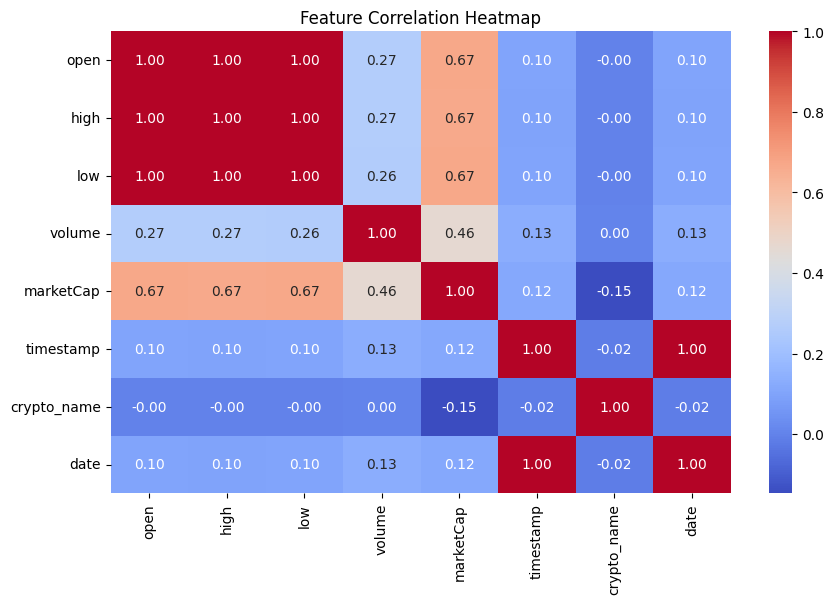

📊 Random Forest Results:
Mean Absolute Error: 12.25106766719521
Mean Squared Error: 42987.265164428805
R2 Score: 0.9984547618909332

📊 XGBoost Results:
Mean Absolute Error: 25.458363170462466
Mean Squared Error: 39126.93834135948
R2 Score: 0.9985935268041614

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1841
[LightGBM] [Info] Number of data points in the train set: 58356, number of used features: 8
[LightGBM] [Info] Start training from score 867.435998


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


📊 LightGBM Results:
Mean Absolute Error: 30.888085551423426
Mean Squared Error: 63124.67846135992
R2 Score: 0.9977308940587875

🔍 Running Hyperparameter Tuning for XGBoost...



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ Best Parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 100}

🏆 Final Model Performance:
Mean Absolute Error: 26.16855813049329
Mean Squared Error: 39121.974080299835
R2 Score: 0.9985937052515537


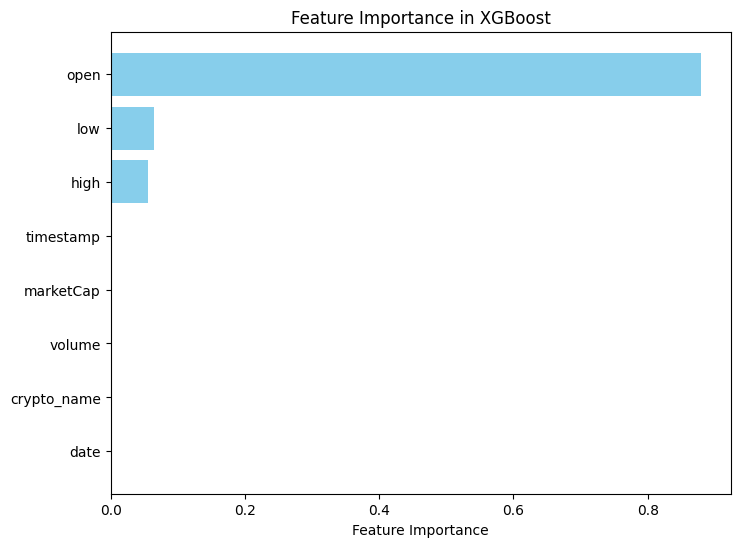

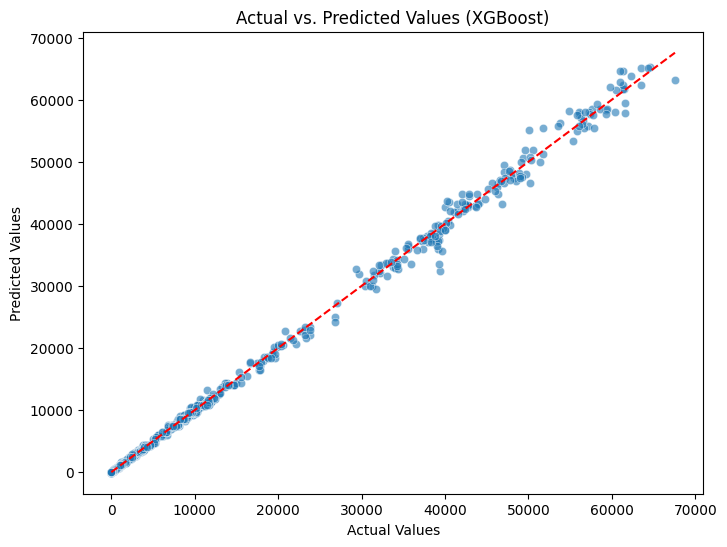

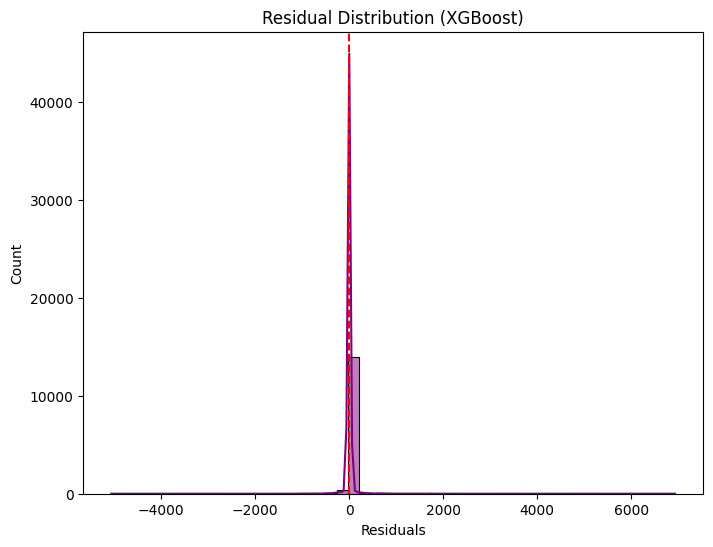

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📌 Load Dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# 📌 Drop unnecessary column if 'Unnamed: 0' exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# 📌 Convert datetime column if present and encode 'crypto_name'
for col in df.columns:
    if df[col].dtype == "object":  # Check for non-numeric data
        try:
            df[col] = pd.to_datetime(df[col])  # Convert to datetime
            df[col] = df[col].astype(int) // 10**9  # Convert to Unix timestamp
        except ValueError:
            # If not datetime, try encoding if it's 'crypto_name'
            if col == 'crypto_name':
                from sklearn.preprocessing import LabelEncoder
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col])
            else:
                print(f"Skipping column: {col} (not datetime or crypto_name)")

# 📌 Handle Missing Values
df.ffill(inplace=True)  # Forward fill missing values

# 📌 Define Features (X) and Target Variable (y)
target_column = "close"  # Adjust if needed
X = df.drop(columns=[target_column])
y = df[target_column]

# 📌 Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📊 Plot Feature Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 📌 Initialize Models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

# 📌 Train & Evaluate Models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}
    print(f"📊 {name} Results:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}\n")

# 📌 Hyperparameter Tuning for Best Model
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = models[best_model_name]

param_grid = {
    "Random Forest": {"n_estimators": [100, 200, 300]},
    "XGBoost": {"learning_rate": [0.01, 0.1, 0.2], "n_estimators": [100, 200]},
    "LightGBM": {"num_leaves": [31, 50], "learning_rate": [0.01, 0.1]}
}

print(f"🔍 Running Hyperparameter Tuning for {best_model_name}...\n")

grid_search = GridSearchCV(best_model, param_grid[best_model_name], cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 📌 Best Parameters & Final Evaluation
print(f"✅ Best Parameters for {best_model_name}: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
final_pred = best_model.predict(X_test)

final_mae = mean_absolute_error(y_test, final_pred)
final_mse = mean_squared_error(y_test, final_pred)
final_r2 = r2_score(y_test, final_pred)

print("\n🏆 Final Model Performance:")
print(f"Mean Absolute Error: {final_mae}")
print(f"Mean Squared Error: {final_mse}")
print(f"R2 Score: {final_r2}")

# 📊 Feature Importance for Best Model
if hasattr(best_model, "feature_importances_"):
    feature_importance = best_model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    plt.figure(figsize=(8, 6))
    plt.barh(np.array(X.columns)[sorted_idx], feature_importance[sorted_idx], color="skyblue")
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importance in {best_model_name}")
    plt.show()

# 📊 Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=final_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted Values ({best_model_name})")
plt.show()

# 📊 Residual Plot to Analyze Errors
residuals = y_test - final_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True, color="purple")
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Residuals")
plt.title(f"Residual Distribution ({best_model_name})")
plt.show()


<ipython-input-20-754eb485b53b>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1841
[LightGBM] [Info] Number of data points in the train set: 58356, number of used features: 8
[LightGBM] [Info] Start training from score 867.435998


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-20-754eb485b53b>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="coolwarm")
<ipython-input-20-754eb485b53b>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette="coolwarm")
<ipython-input-20-754eb485b53b>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

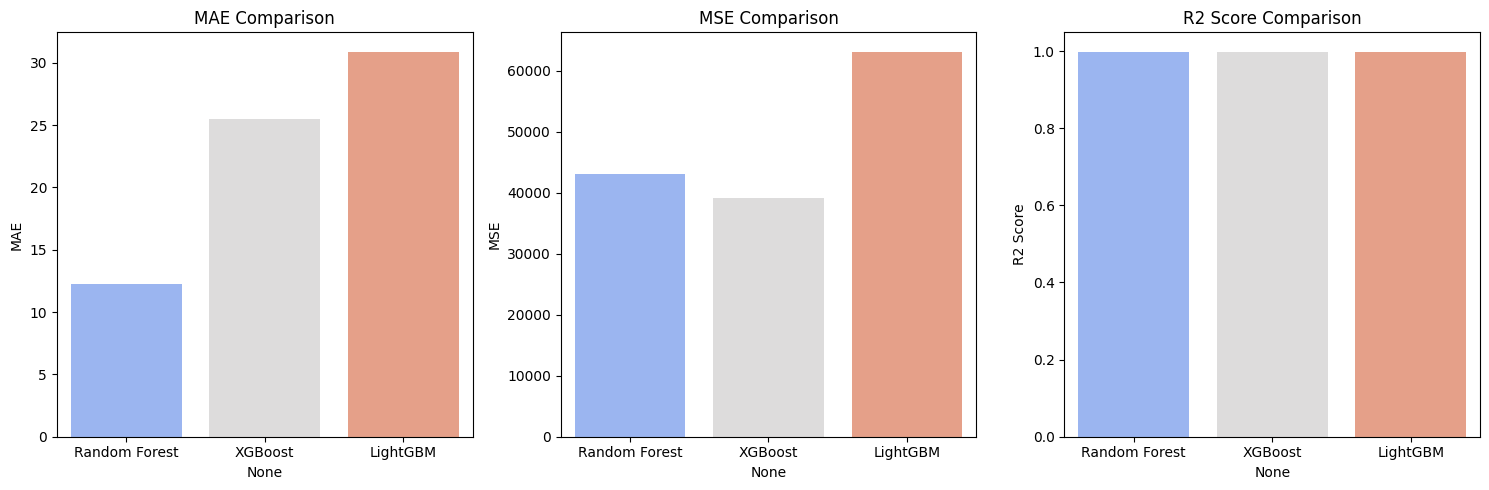

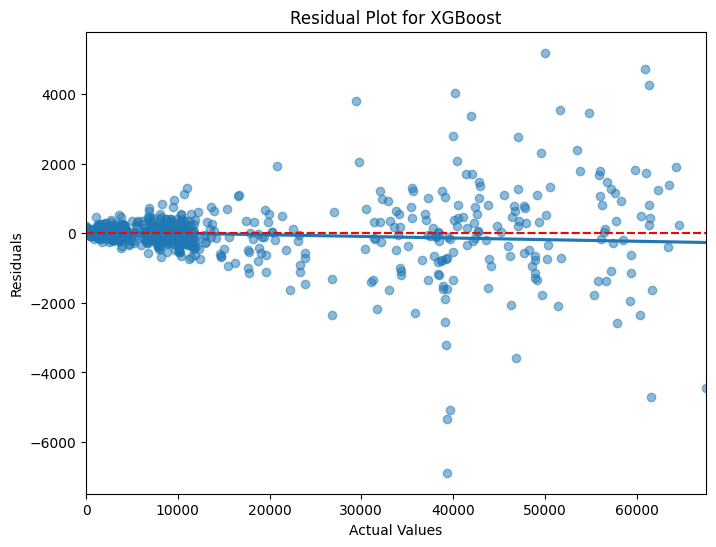

<Figure size 1000x600 with 0 Axes>

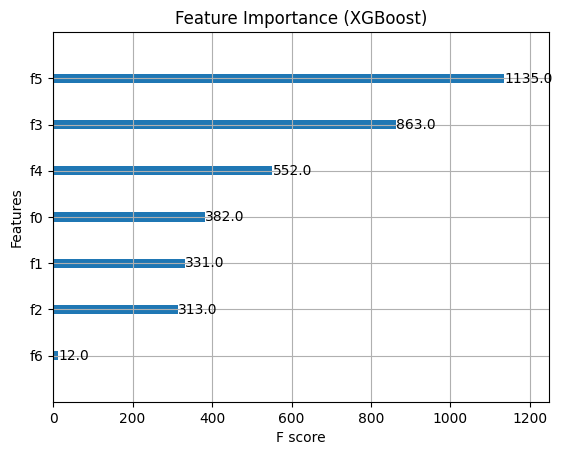

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📌 Load Dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# 📌 Drop unnecessary column if 'Unnamed: 0' exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# 📌 Convert datetime column if present and encode 'crypto_name'
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col] = pd.to_datetime(df[col])
            df[col] = df[col].astype(int) // 10**9
        except ValueError:
            if col == 'crypto_name':
                from sklearn.preprocessing import LabelEncoder
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col])

# 📌 Handle Missing Values
df.ffill(inplace=True)

# 📌 Define Features (X) and Target Variable (y)
target_column = "close"
X = df.drop(columns=[target_column])
y = df[target_column]

# 📌 Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 Initialize Models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

# 📌 Train & Evaluate Models
results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}
    predictions[name] = y_pred

# 📌 Convert Results to DataFrame for Visualization
results_df = pd.DataFrame(results).T

# 📊 **1. Bar Chart for MAE, MSE, R² Score**
plt.figure(figsize=(15, 5))
metrics = ["MAE", "MSE", "R2 Score"]
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x=results_df.index, y=results_df[metric], palette="coolwarm")
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

# 📊 **2. Residual Plot for Best Model (XGBoost)**
best_model_name = "XGBoost"
y_pred_best = predictions[best_model_name]

plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred_best, lowess=True, scatter_kws={"alpha": 0.5})
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title(f"Residual Plot for {best_model_name}")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

# 📊 **3. Feature Importance (XGBoost)**
plt.figure(figsize=(10, 6))
plot_importance(models["XGBoost"], importance_type="weight", max_num_features=10)
plt.title("Feature Importance (XGBoost)")
plt.show()
